In [30]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

classes = ["30c","30cw", "30cww", "40c", "40cw", "40cww", "50c", "50cw", 
              "60c", "60cw", "70c", "95c", "bleech_ng", "bleech_nl", "bleech_o", 
              "dry_c", "dry_c_ng", "dry_c_w", "dry_flat", "dry_flat_s", "dry_flat_sw",
              "dry_flat_w", "f_dry_c", "f_w_dry_c", "hand_40c", "hanger_d",
              "hanger_d_s", "hanger_s", "hanger_wet", "house_c_ng", "iron_ng",
              "iron110c", "iron150c", "iron200c", "tanb_ng", "tanb60", "tanb80",
              "w_w_wet", "w_wet", "wet_c", "wet_ng"]

file_path = "/Users/takachamp/cleaning_images_training" 
img_height = 50
img_width = 50
batch_size = 16


image_generator = ImageDataGenerator(rescale = 1.0/255.0,
                                   validation_split=0.2,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2)

train_generator = image_generator.flow_from_directory(
    file_path,
    target_size = (img_height, img_width),
    class_mode = 'categorical',
    batch_size = batch_size,
    subset = 'training')

validation_generator = image_generator.flow_from_directory(
    file_path,
    target_size = (img_height, img_width),
    class_mode = 'categorical',
    batch_size = batch_size,
    subset = 'validation')

input_tensor = Input(shape=(img_width, img_height, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

model = Sequential()
model.add(Flatten(input_shape=vgg16.output_shape[1:]))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(len(data_dir), activation='softmax'))
vgg16_model = Model(inputs=vgg16.input, outputs=model(vgg16.output))

for layer in model.layers[:19]:
    layer.trainable = False

vgg16_model.compile(loss='categorical_crossentropy',
                   optimizer = Adam(lr=1e-4),
                   metrics = ['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss',
                              patience=10,
                              min_delta=0.0,
                              verbose=1)

nb_epochs = 500

history = vgg16_model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = nb_epochs,
    verbose=1,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    callbacks=[early_stopping])

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

result_dir = 'results'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
    
vgg16_model.save(os.path.join(result_dir, 'vgg16_model.h5'))

Found 167 images belonging to 41 classes.
Found 21 images belonging to 41 classes.
Epoch 1/500
10/10 [==============================] - 19s 2s/step - loss: 4.0940 - accuracy: 0.0132 - val_loss: 3.1787 - val_accuracy: 0.2500
Epoch 2/500
10/10 [==============================] - 18s 2s/step - loss: 3.5314 - accuracy: 0.0993 - val_loss: 2.4765 - val_accuracy: 0.4375
Epoch 3/500
10/10 [==============================] - 19s 2s/step - loss: 3.2512 - accuracy: 0.1854 - val_loss: 2.2270 - val_accuracy: 0.5625
Epoch 4/500
10/10 [==============================] - 20s 2s/step - loss: 3.2026 - accuracy: 0.1750 - val_loss: 1.9106 - val_accuracy: 0.6250
Epoch 5/500
10/10 [==============================] - 19s 2s/step - loss: 2.7346 - accuracy: 0.3046 - val_loss: 1.5614 - val_accuracy: 0.7500
Epoch 6/500
10/10 [==============================] - 17s 2s/step - loss: 2.6699 - accuracy: 0.3239 - val_loss: 1.3209 - val_accuracy: 0.8750
Epoch 7/500
10/10 [==============================] - 19s 2s/step - loss

KeyError: 'acc'

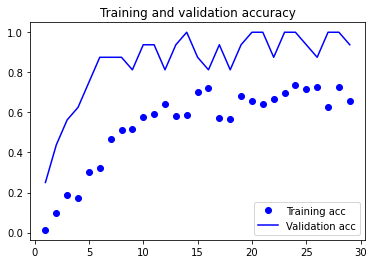

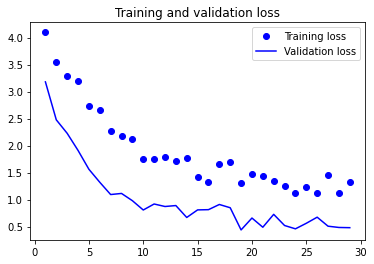

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

result_dir = 'results'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
    
vgg16_model.save(os.path.join(result_dir, 'vgg16_model.h5'))

In [33]:
model.save_weights('./Users/takachamp/Python')